# Predicting Loan Defaults

### Names:
Hayden Strikwerda, Bryce Kastner, and Hannah George

### Project Purpose

Our project is to predict loan defaults using machine learning. Through this project we hope to gain a clearer understanding of what factors most strongly influence whether a loan is approved or not and to use this information to create a machine learning algorithm which predicts whether a loan would be approved or not.

In order to do so we first found our dataset (located at http://weka.8497.n7.nabble.com/file/n23121/credit_fruad.arff) and cleaned it, turning each of the columns into numerical data. 

## Imports

In [90]:
from scipy.io import arff
import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Loading the Data

In [91]:
data = pd.DataFrame(arff.loadarff('german_credit_fruad.arff.txt')[0])
data1 = pd.DataFrame(arff.loadarff('german_credit_fruad.arff.txt')[0])



## Cleaning the Data

The following code is for cleaning the data. First we go through and change the type of the data from bytes to string. Then, in order to make the data easier to work with, we changed the data type from strings to integers. We provide a key for the numerical values at the top of the code.  At the end, we saved our dataframe with the cleaned data into a csv file to save time. 

Here is the key for reference:

'''
 Relabeled values in attribute over_draft
    
    From: no checking        To: 0
    From: <0                 To: 1          
    From: 0<=X<200           To: 2            
    From: >=200              To: 3       


 Relabeled values in attribute credit_history
    From: no credits/all paid             To: 0
    From: all paid                        To: 1          
    From: existing paid                   To: 2     
    From: delayed previously              To: 3
    From: critical/other existing credit  To: 4


 Relabeled values in attribute purpose
    From: new car                       To: 0           
    From: used car                      To: 1          
    From: furniture/equipment           To: 2 
    From: radio/tv                      To: 3            
    From: domestic appliance            To: 4
    From: repairs                       To: 5             
    From: education                     To: 6          
    From: vacation                      To: 7            
    From: retraining                    To: 8          
    From: business                      To: 9            
    From: other                         To: 10               


 Relabeled values in attribute Average_Credit_Balance
    From: no known savings              To: 0              
    From: <100                          To: 1        
    From: 100<=X<500                    To: 2       
    From: 500<=X<1000                   To: 3            
    From: >=1000                        To: 4  


 Relabeled values in attribute employment
    From: unemployed                    To: 0           
    From: <1                            To: 1                
    From: 1<=X<4                        To: 2            
    From: 4<=X<7                        To: 3            
    From: >=7                           To: 4               


 Relabeled values in attribute personal_status
    From: male single                  To: 0      
    From: male mar/wid                 To: 1
    From: male div/sep                 To: 2      
    From: female single                To: 3     
    From: female div/dep/mar           To: 4     


 Relabeled values in attribute other_parties
    From: none                          To: 0                
    From: co applicant                  To: 1      
    From: guarantor                     To: 2          


 Relabeled values in attribute property_magnitude
    From: no known property             To: 0       
    From: life insurance                To: 1    
    From: car                           To: 2                 
    From: real estate                   To: 3 


 Relabeled values in attribute other_payment_plans
    From: none                          To: 0                
    From: stores                        To: 1              
    From: bank                          To: 2                


 Relabeled values in attribute housing
    From: rent                          To: 0                
    From: own                           To: 1                 
    From: for free                      To: 2          


 Relabeled values in attribute job
    From: unemp/unskilled non res       To: 0
    From: unskilled resident            To: 1 
    From: skilled                       To: 2             
    From: high qualif/self emp/mgmt     To: 3


 Relabeled values in attribute own_telephone
    From: none                          To: 0                
    From: yes                           To: 1                 


 Relabeled values in attribute foreign_worker
    From: no                           To: 0                  
    From: yes                          To: 1                  


 Relabeled values in attribute class
    From: bad                          To: 0                 
    From: good                         To: 1
'''             

This next bit of code is for changing the type of some of the columns from byte to string.

In [92]:
for column in data.columns:
    i = 0
    for item in data[column]:
        if isinstance(item, bytes) == True:
                fixed = item.decode("utf-8")
                fixed = fixed.replace("'","")
                data.loc[i, column] = str(fixed)
                item = str(fixed)
        i += 1

Next, we want to change the data into a more workable type so we convert some of the columns from a string to an integer. 

In [93]:
gender = []

for column in data.columns:
    
    relabeled = []
    
    for item in data[column]:
        if column == 'over_draft':
            if item == 'no checking':
                relabeled.append(0)
            elif item == '<0':
                relabeled.append(1)
            elif item == '0<=X<200':
                relabeled.append(2)
            elif item == '>=200':
                relabeled.append(3)
            else:
                relabeled.append('ERROR')
        elif column == 'credit_history':
            if item == 'no credits/all paid':
                relabeled.append(0)
            elif item == 'all paid':
                relabeled.append(1)
            elif item == 'existing paid':
                relabeled.append(2)
            elif item == 'delayed previously':
                relabeled.append(3)
            elif item == 'critical/other existing credit':
                relabeled.append(4)
            else:
                relabeled.append('ERROR')
        elif column == 'purpose':
            if item == 'new car':
                relabeled.append(0)
            elif item == 'used car':
                relabeled.append(1)
            elif item == 'furniture/equipment':
                relabeled.append(2)
            elif item == 'radio/tv':
                relabeled.append(3)
            elif item == 'domestic appliance':
                relabeled.append(4)
            elif item == 'repairs':
                relabeled.append(5)
            elif item == 'education':
                relabeled.append(6)
            elif item == 'vacation':
                relabeled.append(7)
            elif item == 'retraining':
                relabeled.append(8)
            elif item == 'business':
                relabeled.append(9)
            elif item == 'other':
                relabeled.append(10)
            else:
                relabeled.append('ERROR')
        elif column == 'Average_Credit_Balance':
            if item == 'no known savings':
                relabeled.append(0)
            elif item == '<100':
                relabeled.append(1)
            elif item == '100<=X<500':
                relabeled.append(2)
            elif item == '500<=X<1000':
                relabeled.append(3)
            elif item == '>=1000':
                relabeled.append(4)
        elif column == 'employment':
            if item == 'unemployed':
                relabeled.append(0)
            elif item == '<1':
                relabeled.append(1)
            elif item == '1<=X<4':
                relabeled.append(2)
            elif item == '4<=X<7':
                relabeled.append(3)
            elif item == '>=7':
                relabeled.append(4)
        elif column == 'personal_status':
            if item == 'male single':
                relabeled.append(0)
                gender.append(0)
            elif item == 'male mar/wid':
                relabeled.append(1)
                gender.append(0)
            elif item == 'male div/sep':
                relabeled.append(2)
                gender.append(0)
            elif item == 'female single':
                relabeled.append(3)
                gender.append(1)
            elif item == 'female div/dep/mar':
                relabeled.append(4)
                gender.append(1)
        elif column == 'other_parties':
            if item == 'none':
                relabeled.append(0)
            elif item == 'co applicant':
                relabeled.append(1)
            elif item == 'guarantor':
                relabeled.append(2)
        elif column == 'property_magnitude':
            if item == 'no known property':
                relabeled.append(0)
            elif item == 'life insurance':
                relabeled.append(1)
            elif item == 'car':
                relabeled.append(2)
            elif item == 'real estate':
                relabeled.append(3)
        elif column == 'other_payment_plans':
            if item == 'none':
                relabeled.append(0)
            elif item == 'stores':
                relabeled.append(1)
            elif item == 'bank':
                relabeled.append(2)
        elif column == 'housing':
            if item == 'rent':
                relabeled.append(0)
            elif item == 'own':
                relabeled.append(1)
            elif item == 'for free':
                relabeled.append(2)
        elif column == 'job':
            if item == 'unemp/unskilled non res':
                relabeled.append(0)
            elif item == 'unskilled resident':
                relabeled.append(1)
            elif item == 'skilled':
                relabeled.append(2)
            elif item == 'high qualif/self emp/mgmt':
                relabeled.append(3)
        elif column == 'own_telephone':
            if item == 'none':
                relabeled.append(0)
            elif item == 'yes':
                relabeled.append(1)
        elif column == 'foreign_worker':
            if item == 'no':
                relabeled.append(0)
            elif item == 'yes':
                relabeled.append(1)
        elif column == 'class':
            if item == 'bad':
                relabeled.append(0)
            elif item == 'good':
                relabeled.append(1)
            
    if len(relabeled) != 0:
        data[column] = relabeled

data['gender'] = gender

Now we save the data into a .csv file.

In [94]:
data.to_csv('cleanedData.csv')

## Loading the Data From the New .csv File

In [95]:
data = pd.read_csv('cleanedData.csv')
data = data.drop('Unnamed: 0', axis=1)
data = data.reindex(sorted(data.columns), axis=1)
data.head()

,Average_Credit_Balance,cc_age,class,credit_history,credit_usage,current_balance,employment,existing_credits,foreign_worker,gender,...,location,num_dependents,other_parties,other_payment_plans,over_draft,own_telephone,personal_status,property_magnitude,purpose,residence_since
0,0,67.0,1,4,6.0,1169.0,4,2.0,1,0,...,4.0,1.0,0,0,1,1,0,3,3,4.0
1,1,22.0,0,2,48.0,5951.0,2,1.0,1,1,...,2.0,1.0,0,0,2,0,4,3,3,2.0
2,1,49.0,1,4,12.0,2096.0,3,1.0,1,0,...,2.0,2.0,0,0,0,0,0,3,6,3.0
3,1,45.0,1,2,42.0,7882.0,3,1.0,1,0,...,2.0,2.0,2,0,1,0,0,1,2,4.0
4,1,53.0,0,3,24.0,4870.0,2,2.0,1,0,...,3.0,2.0,0,0,1,0,0,0,0,4.0


## Visualizing the Data

This next code is here to understand the relationships between the variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED411717F0>,
      dtype=object)

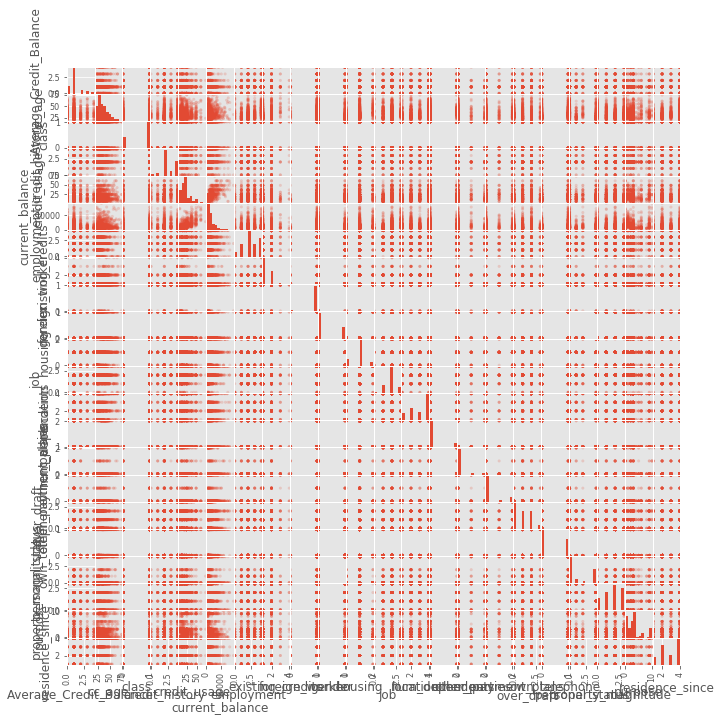

In [96]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.2, figsize=(11, 11))

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

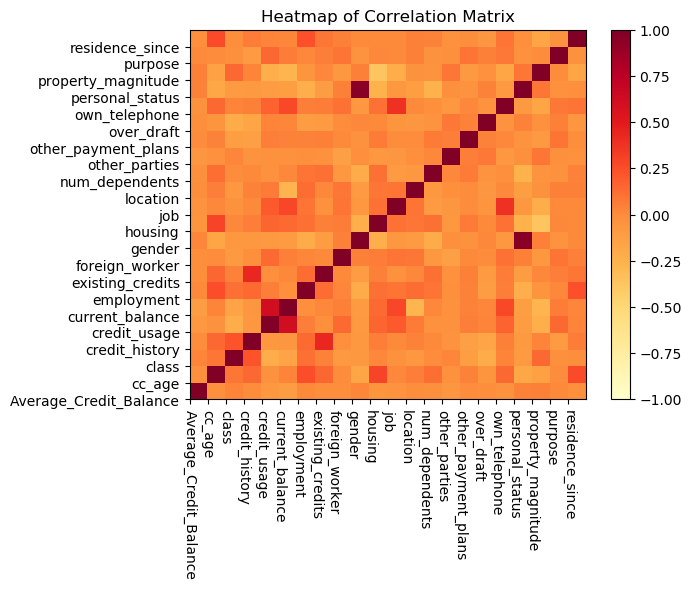

In [97]:
# Computing the correlation matrix
correlation = data.corr()

# Calculate and visualize correlations as matrix
plt.style.use('default')
heatmap = plt.pcolor(correlation, cmap=plt.cm.YlOrRd, vmin = -1, vmax = 1)

# Plot the legend on the side
plt.colorbar(heatmap)
plt.xticks(np.arange(22), ['Average_Credit_Balance', 'cc_age', 'class', 'credit_history',
       'credit_usage', 'current_balance', 'employment', 'existing_credits',
       'foreign_worker', 'gender', 'housing', 'job', 'location',
       'num_dependents', 'other_parties', 'other_payment_plans', 'over_draft',
       'own_telephone', 'personal_status', 'property_magnitude', 'purpose',
       'residence_since'], rotation = -90)
plt.yticks(np.arange(22), ['Average_Credit_Balance', 'cc_age', 'class', 'credit_history',
       'credit_usage', 'current_balance', 'employment', 'existing_credits',
       'foreign_worker', 'gender', 'housing', 'job', 'location',
       'num_dependents', 'other_parties', 'other_payment_plans', 'over_draft',
       'own_telephone', 'personal_status', 'property_magnitude', 'purpose',
       'residence_since'])

plt.title("Heatmap of Correlation Matrix")

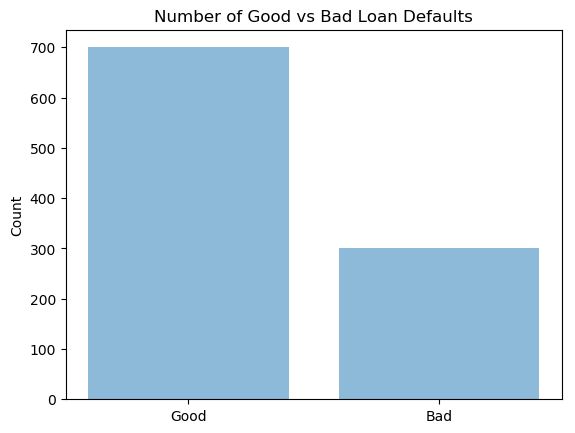

In [98]:
objects = ('Good', 'Bad')
y_pos = np.arange(len(objects))
performance = [700,300]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Number of Good vs Bad Loan Defaults')
 
plt.show()


## Creating the Machine Learning Algorithm

In [99]:
Xcorr = data[["cc_age", "credit_usage", "current_balance", "existing_credits", "num_dependents", "residence_since","class"]]
y = data['class']
data.drop(["class"],axis = 1, inplace = True)
X = data


In [102]:
Xcorr.head()

,cc_age,credit_usage,current_balance,existing_credits,num_dependents,residence_since,class
0,67.0,6.0,1169.0,2.0,1.0,4.0,1
1,22.0,48.0,5951.0,1.0,1.0,2.0,0
2,49.0,12.0,2096.0,1.0,2.0,3.0,1
3,45.0,42.0,7882.0,1.0,2.0,4.0,1
4,53.0,24.0,4870.0,2.0,2.0,4.0,0


### Perceptron Algorithm
This is our baseline algorithm

Since the Perceptron algorithm uses float variable types we will just use certain columns from our dataset. 

In [100]:

X1 = data[["cc_age", "credit_usage", "current_balance", "existing_credits", "num_dependents", "residence_since"]]


Text(0.5, 1.0, 'Heatmap of Correlation Matrix of Float Values')

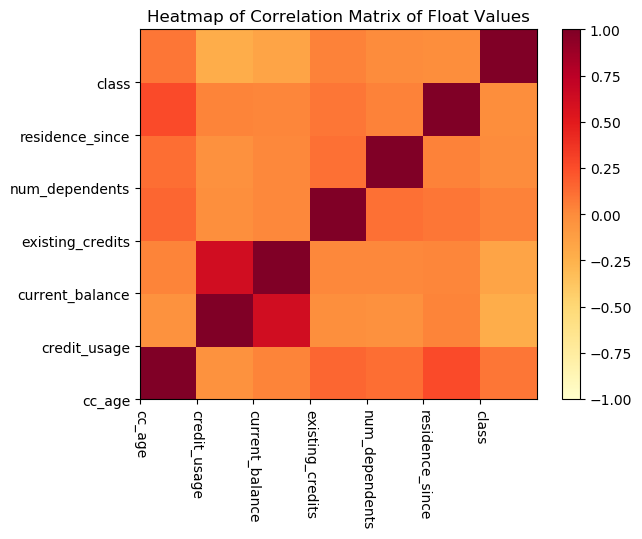

In [104]:
# Computing the correlation matrix
correlation = Xcorr.corr()

# Calculate and visualize correlations as matrix
plt.style.use('default')
heatmap = plt.pcolor(correlation, cmap=plt.cm.YlOrRd, vmin = -1, vmax = 1)

# Plot the legend on the side
plt.colorbar(heatmap)
plt.xticks(np.arange(7), ["cc_age", "credit_usage", "current_balance", "existing_credits", "num_dependents", "residence_since", "class"], rotation = -90)
plt.yticks(np.arange(7), ["cc_age", "credit_usage", "current_balance", "existing_credits", "num_dependents", "residence_since","class"])

plt.title("Heatmap of Correlation Matrix of Float Values")

In [42]:
# Split the data into a training and test set. 
X_train, X_test, y_train, y_test = train_test_split(X1, y)


# Build a classifier using the training dataset.
perceptron = Perceptron(tol = 1e-3, fit_intercept = True, max_iter = 100)
perceptron.fit(X_train, y_train)


# Compute the accuracy and the confusion matrix of the model using the test dataset. 
y_pred = perceptron.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

Accuracy =  0.676
Confusion Matrix:
[[  0  81]
 [  0 169]]


In [59]:
from sklearn.preprocessing import StandardScaler

# Split the data into a training and test set. 
X_train, X_test, y_train, y_test = train_test_split(X1, y)


# Scale the dataset 

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Build a classifier using the training dataset.
perceptron = Perceptron(tol = 1e-3, fit_intercept = True, max_iter = 100)
perceptron.fit(X_train_std, y_train)


# Compute the accuracy and the confusion matrix of the model using the test dataset. 
y_pred = perceptron.predict(X_test_std)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

Accuracy =  0.648
Confusion Matrix:
[[ 29  50]
 [ 38 133]]


In [154]:
# This data has the least correlated variable taken out (cc_age) 


X2 = X1[["credit_usage", "current_balance", "existing_credits", "num_dependents", "residence_since"]]
# Split the data into a training and test set. 
X_train, X_test, y_train, y_test = train_test_split(X1, y)


# Scale the dataset 

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Build a classifier using the training dataset.
perceptron = Perceptron(n_iter=100, eta0=0.1, random_state=0)
perceptron.fit(X_train_std, y_train)


# Compute the accuracy and the confusion matrix of the model using the test dataset. 
y_pred = perceptron.predict(X_test_std)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

Accuracy =  0.704
Confusion Matrix:
[[  9  61]
 [ 13 167]]


C:\Users\Hayden.DESKTOP-B22L498\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


### SVM Model

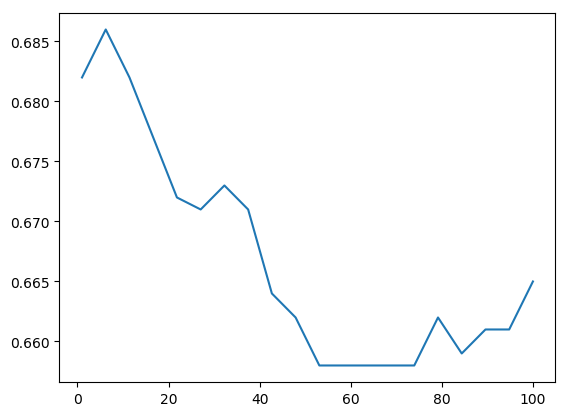

In [11]:
# Finding the best value of C by using cross_val_score and plotting the results.
Cs = np.linspace(1,100,20)
Accuracies = np.zeros(Cs.shape[0])

for i,C in enumerate(Cs):
    C_test = svm.SVC(kernel='rbf', C = C, gamma = 'scale')
    scores = cross_val_score(estimator = C_test, X = X, y = y, cv=5, scoring='accuracy')
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

From this plot, we can tell the value of C which results in the highest accuracy is 5. 

In [118]:


# Split the data into a training and test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y)


# Build a classifier using the training dataset.
SVM_model = svm.SVC(kernel='rbf', C = 5, gamma = 'scale')
SVM_model.fit(X_train, y_train)


# Compute the accuracy and the confusion matrix of the model using the test dataset. 
y_pred = SVM_model.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

Accuracy =  0.672
Confusion Matrix:
[[  6  74]
 [  8 162]]


In [ ]:

from sklearn.preprocessing import StandardScaler

# Split the data into a training and test set. 
X_train, X_test, y_train, y_test = train_test_split(X1, y)


# Scale the dataset 

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


# Split the data into a training and test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y)


# Build a classifier using the training dataset.
SVM_model = svm.SVC(kernel='rbf', C = 5, gamma = 'scale')
SVM_model.fit(X_train, y_train)


# Compute the accuracy and the confusion matrix of the model using the test dataset. 
y_pred = SVM_model.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

## Decision Tree

Created a Decision Tree using all avalible variables in attempt to determine whether an applicant would be approved for a loan or not.

In [15]:
decisionTree = tree.DecisionTreeClassifier()

XTrain, XTest, yTrain, yTest = train_test_split(X, y)

# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain)
# measure accuracy
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest)
# measure accuracy
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data =  1.0
Accuracy on test data =  0.736


When training and testing using all of our data we get a 100% accuracy on the training data set which is expected since this would overfit the data. But, we still recieve a faily low accuracy on our test set.

Let's work only with the numerical and categorical variables and omit values could contain information that is hard to  make sense of without more context.

In [16]:
A = X[['cc_age', 'credit_history', 'credit_usage', 'current_balance', 'existing_credits', 'location', 'num_dependents']]
decisionTree = tree.DecisionTreeClassifier()

ATrain, ATest, yTrain, yTest = train_test_split(A,y)
# fit the tree with the traing data
decisionTree = decisionTree.fit(ATrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(ATrain)
# measure accuracy
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(ATest)
# measure accuracy
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data =  1.0
Accuracy on test data =  0.66


What we can take away from this Decision Tree is that if we focus our analysis on factors that are mainly concerned with the applicants credit, then we can get a fairly accurate prediction on whether an applicant would be approved for a loan or not at an accuracy of 70%.

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest =  RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=0)

trained_forest = forest.fit(XTrain, yTrain)

y_pred_train = trained_forest.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = trained_forest.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  1.0
Accuracy on test data=  0.692
